<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### About Dataset

.      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [9]:
boston_df['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, "Distribution of the Median Value of Owner-Occupied Homes in $1000's")

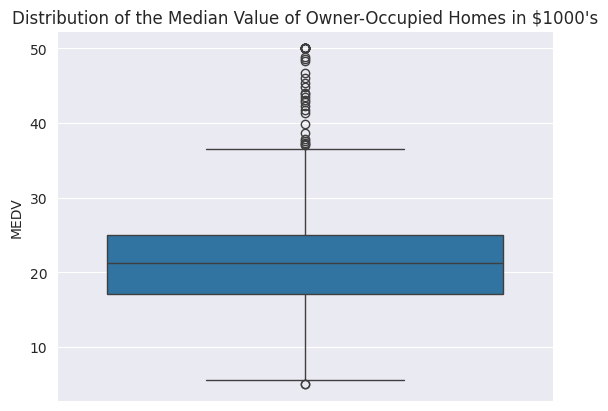

In [11]:
sns.set_style('darkgrid')
sns.boxplot(y = 'MEDV', data = boston_df)
plt.title("Distribution of the Median Value of Owner-Occupied Homes in $1000's")

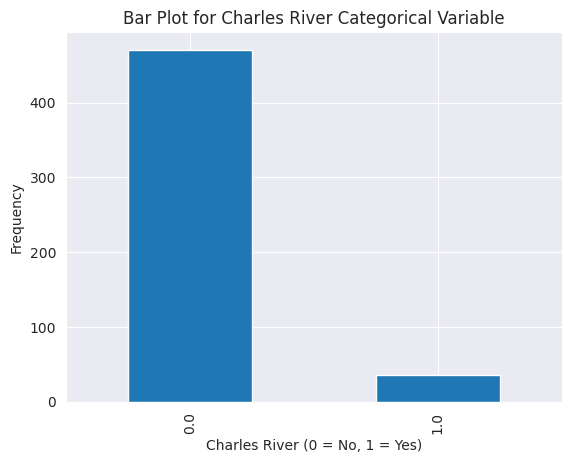

In [12]:
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot for Charles River Categorical Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
boston_df['Age Range'] = 0
for i, age in enumerate(boston_df['AGE']):
    if age <= 35:
        boston_df['Age Range'][i] = 0
    elif (age > 35) & (age < 70):
        boston_df['Age Range'][i] = 1
    else:
        boston_df['Age Range'][i] = 2



In [20]:
boston_df['Age Range'].value_counts()

Age Range
2    287
1    128
0     91
Name: count, dtype: int64

In [21]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Range
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,2
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,2


Text(0.5, 1.0, 'Boxplot for the MEDV Variable against the AGE Variable')

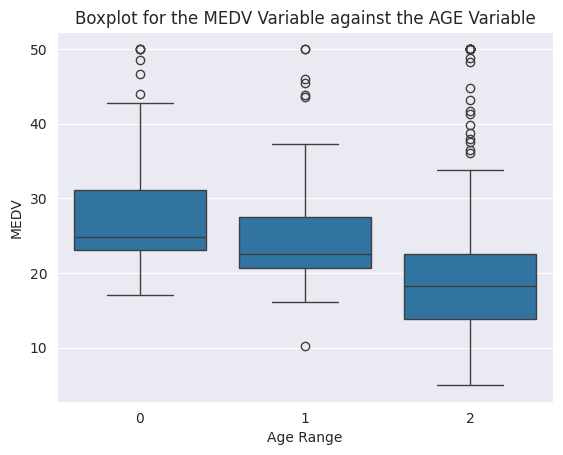

In [22]:
sns.boxplot(x = 'Age Range', y = 'MEDV', data = boston_df)
plt.title('Boxplot for the MEDV Variable against the AGE Variable')

Text(0.5, 1.0, 'Relationship Between Non-retail Business Acres per Town(INDUS) and Nitric Oxides Concentration(NOX)')

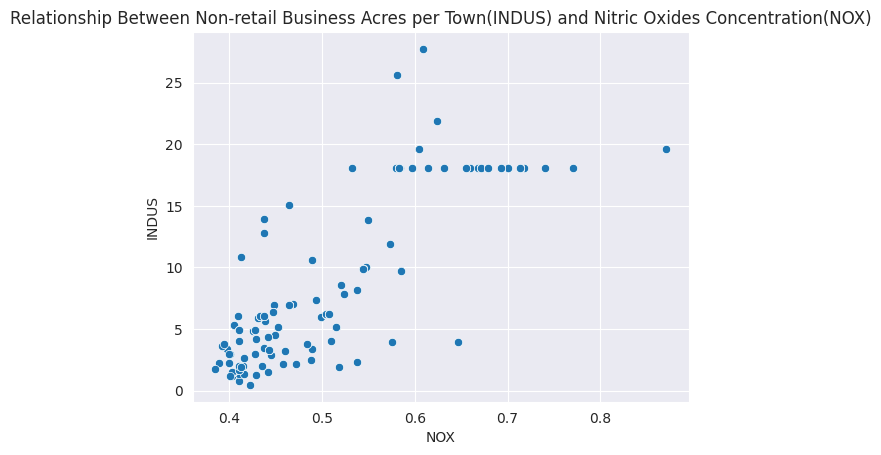

In [23]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title('Relationship Between Non-retail Business Acres per Town(INDUS) and Nitric Oxides Concentration(NOX)')

We see that proportion of non-retail business acres per town(INDUS) increases with nitric oxides concentration(NOX)

In [24]:
import numpy as np
count, bins = np.histogram(boston_df['PTRATIO'], bins = 5)
count, bins

(array([ 17,  73, 104, 116, 196], dtype=int32),
 array([12.6 , 14.48, 16.36, 18.24, 20.12, 22.  ]))

Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio Variable')

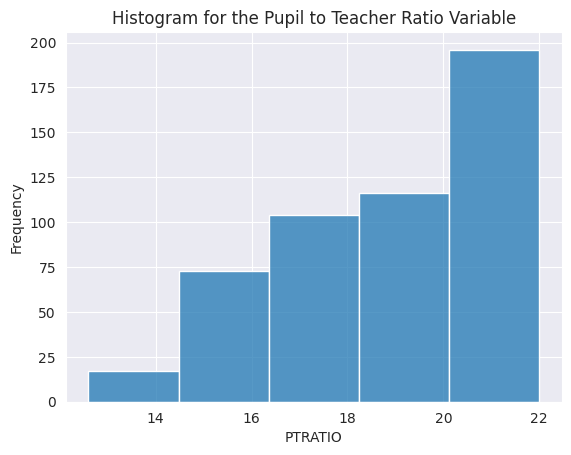

In [25]:
sns.histplot(x = 'PTRATIO', bins = bins, data = boston_df)
plt.ylabel('Frequency')
plt.title('Histogram for the Pupil to Teacher Ratio Variable')

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

H0 = There's no significant difference in median value of houses bounded by the Charles river

H1 = There's a significant difference in median value of houses bounded by the Charles river 

In [26]:
import scipy.stats as stats

In [27]:
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [28]:
t_stat, p_val = stats.ttest_ind(bounded_by_river, not_bounded_by_river)

In [29]:
# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05  # significance level
if p_val < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses bounded by the Charles River.


##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 = There's no difference in Median values of houses for each proportion of owner occupied units built prior to 1940 

H1 = There's a difference in Median values of houses for each proportion of owner occupied units built prior to 1940

In [30]:
# Group the data by AGE categories
groups = boston_df.groupby('AGE')['MEDV'].apply(list)

# Perform the ANOVA test
f_stat, p_val = stats.f_oneway(*groups)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05  # significance level
if p_val < alpha:
    print("There is a significant difference in median values of houses for different AGE categories.")
else:
    print("There is no significant difference in median values of houses for different AGE categories.")

F-statistic: 0.9840091646131598
P-value: 0.5539698276810188
There is no significant difference in median values of houses for different AGE categories.


##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
H0 = There's no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1 = There's a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [34]:
corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05  # significance level
if p_val < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [36]:
# Define the independent variable (with a constant term) and dependent variable
X = boston_df['DIS']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = boston_df['MEDV']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Interpret the results
coef = model.params['DIS']
p_val = model.pvalues['DIS']
print(f"Coefficient: {coef}")
print(f"P-value: {p_val}")

alpha = 0.05  # significance level
if p_val < alpha:
    print("There is a significant impact of the distance to employment centers on the median value of owner-occupied homes.")
else:
    print("There is no significant impact of the distance to employment centers on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        21:36:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0